<a href="https://colab.research.google.com/github/bossnm/Test-Driven-Django-Tutorial/blob/master/colab/iris%ED%92%8D%EC%A2%853%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 가장 훌륭한 예측선

## 4. 파이썬 코딩으로 확인하는 최소 제곱

### 1. 환경 준비

In [ ]:
import numpy as np

### 2. 데이터 준비

In [ ]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

#### [x와 y의 평균값]

In [ ]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


#### [기울기 공식의 분모와 분자]

In [ ]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


### 3. 기울기와 y 절편 구하기

In [ ]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


## 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

### 1. 환경 준비

In [ ]:
import numpy as np

### 2. 데이터 준비

In [ ]:
# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

### 3. 평균 제곱 오차 구하기

In [ ]:
# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [ ]:
# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

평균 제곱 오차: 11.0


Epoch  10, Loss: 0.6877
Epoch  20, Loss: 0.4139
Epoch  30, Loss: 0.2993
Epoch  40, Loss: 0.2282
Epoch  50, Loss: 0.1720
Epoch  60, Loss: 0.1314
Epoch  70, Loss: 0.1031
Epoch  80, Loss: 0.0840
Epoch  90, Loss: 0.0717
Epoch 100, Loss: 0.0633
Epoch 110, Loss: 0.0573
Epoch 120, Loss: 0.0530
Epoch 130, Loss: 0.0499
Epoch 140, Loss: 0.0474
Epoch 150, Loss: 0.0454
Epoch 160, Loss: 0.0437
Epoch 170, Loss: 0.0422
Epoch 180, Loss: 0.0411
Epoch 190, Loss: 0.0401
Epoch 200, Loss: 0.0392
Epoch 210, Loss: 0.0384
Epoch 220, Loss: 0.0377
Epoch 230, Loss: 0.0371
Epoch 240, Loss: 0.0366
Epoch 250, Loss: 0.0360
Epoch 260, Loss: 0.0356
Epoch 270, Loss: 0.0351
Epoch 280, Loss: 0.0346
Epoch 290, Loss: 0.0342
Epoch 300, Loss: 0.0337

 테스트 정확도: 96.67%


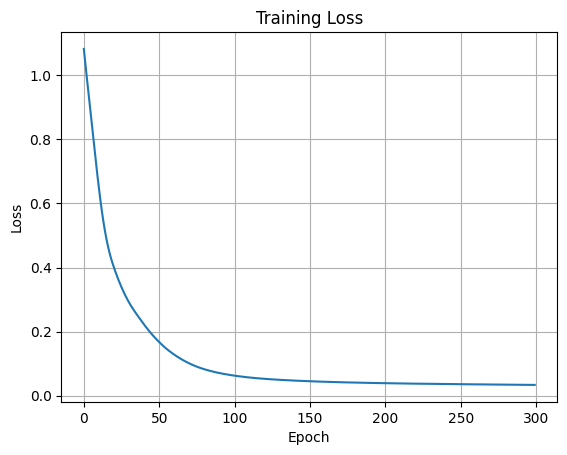

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 전처리
iris = load_iris()
X = iris.data  # shape: [150, 4] # 2차원구조
y = iris.target  # shape: [150,] #정답데이터-1차원구조

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # 층화추출 - 각 종류마다 골고루 뽑아라

# 텐서 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 2. 모델 정의
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 3)  # 출력 노드: 3개 (클래스 수)
        )

    def forward(self, x):
        return self.net(x)

model = IrisNet()

# 3. 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습
epochs = 300
loss_history = []
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d}, Loss: {loss.item():.4f}")

# 5. 평가
model.eval()
with torch.no_grad():
    pred_test = model(X_test_tensor)
    predicted = torch.argmax(pred_test, dim=1)
    accuracy = accuracy_score(y_test, predicted.numpy())

print(f"\n 테스트 정확도: {accuracy * 100:.2f}%")

# 6. 손실 시각화
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()